# Non Parameter Testing

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
from scipy import stats, special

# Chi-Squared Goodness-of-Fit Test

This is the last topic of the this tutorial session. Let's walk through an example, then you will be able to grasp the essence of **chi-squared goodness-of-fit test**.

There are three marksman, who are competing shooting beer bottles hanging on a tree $300m$ away, according to their historical records. Here is their hitting rates.

<table style="width:30%; text-align:center;font-size: 120%">
  <tr>
    <th>Marksman</th>
    <th>Hitting Rate</th>
  </tr>
  <tr>
    <td>A</td>
    <td>24%</td>
  </tr>
  <tr>
    <td>B</td>
    <td>40%</td>
  </tr>
   <tr>
    <td>C</td>
    <td>36%</td>
  </tr>
</table>

Apparently $24\%+40\%+36\%=1$, which is a feature of **multinomial experiment**. 

In order to improve performance, Marksman A attended a hunter training camp, then they agree to compete again. They take turn to shoot and will stop until the 500th bottle is shot. Here is the result. 

<table style="width:30%; text-align:center;font-size: 120%">
  <tr>
    <th>Marksman</th>
    <th>Bottles</th>
  </tr>
  <tr>
    <td>A</td>
    <td>142</td>
  </tr>
  <tr>
    <td>B</td>
    <td>187</td>
  </tr>
   <tr>
    <td>C</td>
    <td>172</td>
  </tr>
</table>

We would like to know if Marksman A has improved which also causes the hitting rate changes. The null hypothesis is specified as
$$
H_0: p_1=24\%, p_2 = 40\%, p_3=36\%\\
H_1: \text{At least one $p_i$ is not equal to its specified value}
$$

Without seeing the lastest competition result, we are looking forward to the **expected frequency** to be
$$
e_1 = 500× 24\% = 120\\
e_2 = 500× 40\% = 200\\
e_3 = 500× 36\% = 180
$$

And here's the comparison bar chart.

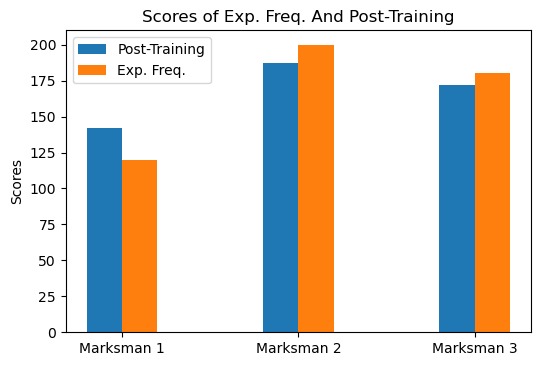

In [14]:
labels = ['Marksman 1', 'Marksman 2', 'Marksman 3']
post_training = np.array([142, 187, 172])
exp_frequency = np.array([120, 200, 180])

x = np.arange(len(labels))
width = .2

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

rects1 = ax.bar(x - width / 2, post_training, width, label='Post-Training')
rects2 = ax.bar(x + width / 2, exp_frequency, width, label='Exp. Freq.')

ax.set(ylabel='Scores', title='Scores of Exp. Freq. And Post-Training')
ax.set(xticks=x, xticklabels=labels)
ax.legend()

plt.show()

If the expected and observed frequencies differ significantly, we would conclude a rejection to the null hypothesis. The test statistic is 
$$
χ^2=∑_{i=1}^k\frac{(f_i-e_i)^2}{e_i}
$$
where $f_i$ and $e_i$ are observed and expected frequencies. In this example, $χ^2$ is
$$
χ^2 = \frac{(f_1-e_1)^2}{e_1}+\frac{(f_2-e_2)^2}{e_2}+\frac{(f_3-e_3)^2}{e_3}
$$

Compute the $χ^2$

In [15]:
sum((post_training - exp_frequency)**2 / exp_frequency)

5.233888888888888

Degree of freedom is $ν=k-1=2$, therefore the rejection region is 
$$
χ^2>χ^2_{.05, 2}
$$
which can be found by ```stats.chi2.ppf```.

In [16]:
stats.chi2.ppf(.95, 2)

5.991464547107979

Because $χ^2$-statistic did not surpass the critical value, we conclude a fail to rejection of null hypothesis. That means even though the post-traning result is better than expectation, it's likely to be a statistical fluke rather than evidence of skill improvement.

# Analysis of one proportion

Calculate the confidence intervals of the population, based on a given data sample.

*Suppose a general practitioner chooses a random sample of 215 women from
the patient register for her general practice, and finds that 39 of them
have a history of suffering from asthma. What is the confidence interval
for the prevalence of asthma?*  (The data are taken from Altman, chapter 10.2.1:)

In [ ]:
# Get the data
numTotal = 215
numPositive = 39

# Calculate the confidence intervals
p = float(numPositive)/numTotal
se = np.sqrt(p*(1-p)/numTotal)
td = stats.t(numTotal-1)
ci = p + np.array([-1,1])*td.isf(0.025)*se

# Print them
print('ONE PROPORTION')
print('The confidence interval for the given sample is {0:5.3f} to {1:5.3f}'.format(
    ci[0], ci[1]))

ONE PROPORTION
The confidence interval for the given sample is 0.130 to 0.233


# Chi-square test to a 2x2 table

Data are taken from Altman, Table 10.10:

*Comparison of number of hours swimming by swimmers with or without erosion of dental enamel:*
    >= 6h: 32 yes, 118 no
    <  6h: 17 yes, 127 no
    
The calculations are done with and without Yate's continuity
correction.

In [ ]:
# Enter the data
obs = np.array([[32, 118], [17, 127]])

# Calculate the chi-square test
chi2_corrected = stats.chi2_contingency(obs, correction=True)
chi2_uncorrected = stats.chi2_contingency(obs, correction=False)

# Print the result
print('CHI SQUARE')
print('The corrected chi2 value is {0:5.3f}, with p={1:5.3f}'.format(chi2_corrected[0], chi2_corrected[1]))
print('The uncorrected chi2 value is {0:5.3f}, with p={1:5.3f}'.format(chi2_uncorrected[0], chi2_uncorrected[1]))

CHI SQUARE
The corrected chi2 value is 4.141, with p=0.042
The uncorrected chi2 value is 4.802, with p=0.028


# Fisher's Exact Test

*Spectacle wearing among juvenile delinquensts and non-delinquents who failed a vision test*

- Spectecle wearers: 1 delinquent, 5 non-delinquents
- non-spectacle wearers: 8 delinquents, 2 non-delinquents'''

(Data are taken from Altman, Table 10.14)

In [ ]:
# Enter the data
obs = np.array([[1,5], [8,2]])

# Calculate the Fisher Exact Test
fisher_result = stats.fisher_exact(obs)

# Print the result
print('The probability of obtaining a distribution at least as extreme '
+ 'as the one that was actually observed, assuming that the null ' +
    'hypothesis is true, is: {0:5.3f}.'.format(fisher_result[1]))

The probability of obtaining a distribution at least as extreme as the one that was actually observed, assuming that the null hypothesis is true, is: 0.035.


# Cochran's Q test

*12 subjects are asked to perform 3 tasks. The outcome of each task is "success" or 
"failure". The results are coded 0 for failure and 1 for success. In the example, subject 1 was successful
in task 2, but failed tasks 1 and 3. Is there a difference between the performance on the three tasks?*

In [ ]:
from statsmodels.sandbox.stats.runs import cochrans_q

tasks = np.array([[0,1,1,0,1,0,0,1,0,0,0,0],
                  [1,1,1,0,0,1,0,1,1,1,1,1],
                  [0,0,1,0,0,1,0,0,0,0,0,0]])

# I prefer a DataFrame here, as it indicates directly what the values mean
df = pd.DataFrame(tasks.T, columns = ['Task1', 'Task2', 'Task3'])

# --- >>> START stats <<< ---
(Q, pVal) = cochrans_q(df)
# --- >>> STOP stats <<< ---

print('Q = {0:5.3f}, p = {1:5.3f}'.format(Q, pVal))
if pVal < 0.05:
    print("There is a significant difference between the three tasks.")

Q = 8.667, p = 0.013
There is a significant difference between the three tasks.


# McNemar test

*McNemars Test should be run in the "exact" version, even though approximate formulas are
typically given in the lecture scripts. Just ignore the statistic that is returned, because
it is different for the two options.*

*In the following example, a researcher attempts to determine if a drug has an effect on a
particular disease. Counts of individuals are given in the table, with the diagnosis
(disease: present or absent) before treatment given in the rows, and the diagnosis
after treatment in the columns. The test requires the same subjects to be included in
the before-and-after measurements (matched pairs).*

In [ ]:
from statsmodels.sandbox.stats.runs import mcnemar

f_obs = np.array([[101, 121],[59, 33]])
(statistic, pVal) = mcnemar(f_obs)

print('p = {0:5.3e}'.format(pVal))
if pVal < 0.05:
    print("There was a significant change in the disease by the treatment.") 

p = 4.434e-06
There was a significant change in the disease by the treatment.
